# PRACTICAL 4
## Devasy Patel
## 20BCE057

Implementing Laplacian, gamma , log, blurring transformation on an image.

In [2]:

import cv2
import numpy as np
from matplotlib import pyplot as plt


# For Gamma transformation


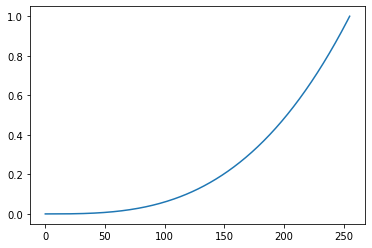

In [17]:
#For Gamma transformation

g= 3

def gamma(img, gamma):
    img = img/255.0
    img = cv2.pow(img, gamma)
    return img

image = cv2.imread('image.jpg')
output = gamma(image, g)

# to display curve of gamma transformation
original = np.array(range(0,256))
# original = original/255.0
transformed = gamma(original, g)
plt.plot(original, transformed)





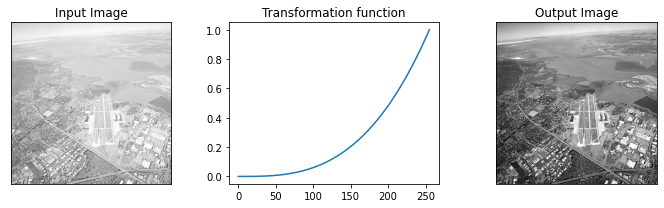

In [16]:
# plot the images
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
axs[0].imshow(image)
axs[0].set_title('Input Image')
axs[0].set_xticks([])
axs[0].set_yticks([])

axs[1].plot(original, transformed)
axs[1].set_title('Transformation function')

axs[2].imshow(output)
axs[2].set_title('Output Image')
axs[2].set_xticks([])
axs[2].set_yticks([])

plt.tight_layout()
plt.show()

# Logarithmic Transformation of an Image

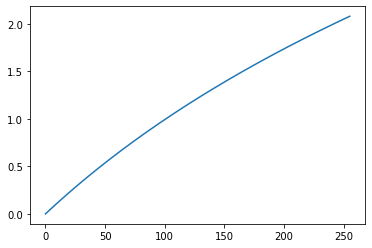

In [38]:
def logaritmic(img, c):
    img = img/255.0
    img = c*np.log(1 + img)
    return img

image = cv2.imread('image2.jpeg')
C = 3
output = logaritmic(image, C)

original = np.array(range(0,256))
transformed = logaritmic(original, C)
plt.plot(original, transformed)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


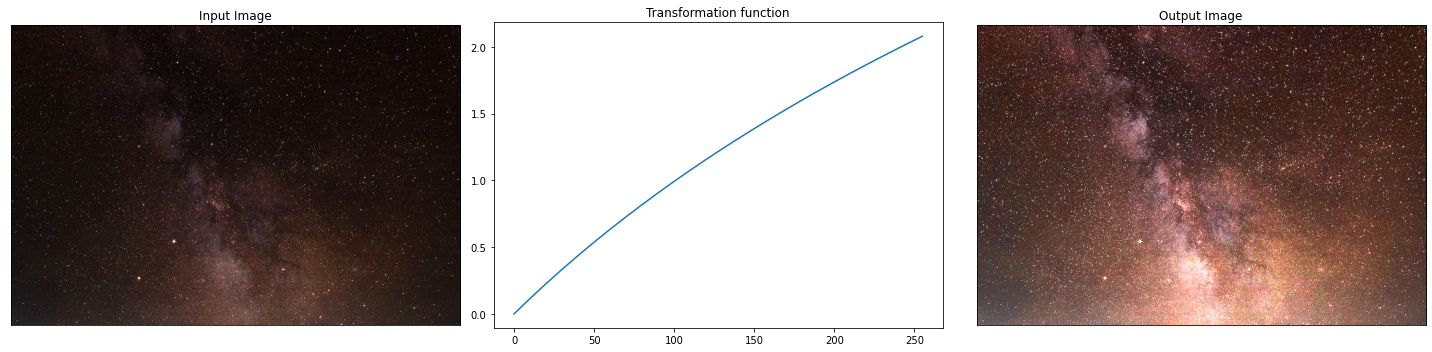

In [39]:
# plot the images
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(image)
axs[0].set_title('Input Image')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[1].plot(original, transformed)
axs[1].set_title('Transformation function')
axs[2].imshow(output)
axs[2].set_title('Output Image')
axs[2].set_xticks([])
axs[2].set_yticks([])
plt.tight_layout()
plt.show()

# Now Blurring Filters on an Image

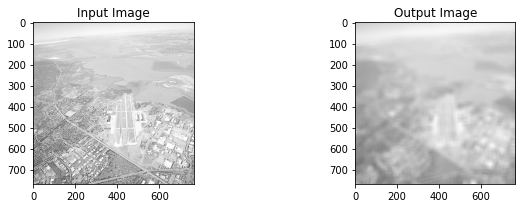

In [36]:
def Blurring(img, n):
    img = cv2.blur(img,(n,n))
    return img

image = cv2.imread('image.jpg')
output = Blurring(image, 25)
 
# plot the images
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].imshow(image)
axs[0].set_title('Input Image')
# axs[0].set_xticks([])
# axs[0].set_yticks([])
axs[1].imshow(output)
axs[1].set_title('Output Image')
# axs[1].set_xticks([])
# axs[1].set_yticks([])
plt.tight_layout()
plt.show()

    

# Now Laplacian Transformation on an Image
l1 = [[0,1,0],[1,-4,1],[0,1,0]]
l2 = [[1,1,1],[1,-8,1],[1,1,1]]
l3 = [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]
l4 = [[0,-1,0],[-1,4,-1],[0,-1,0]]

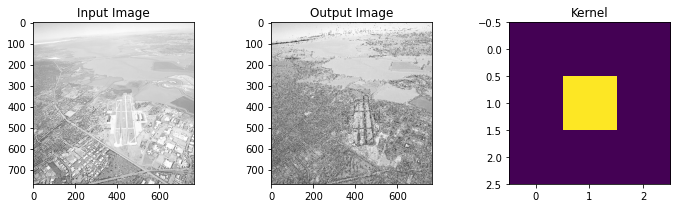

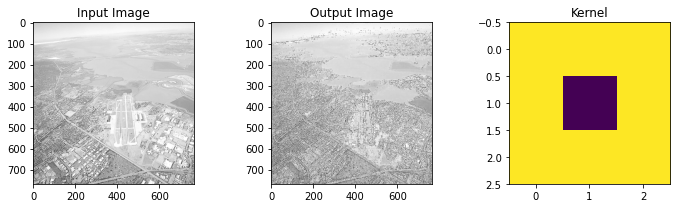

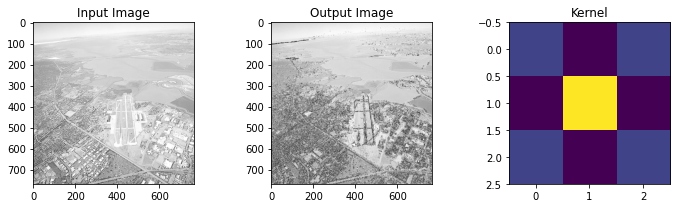

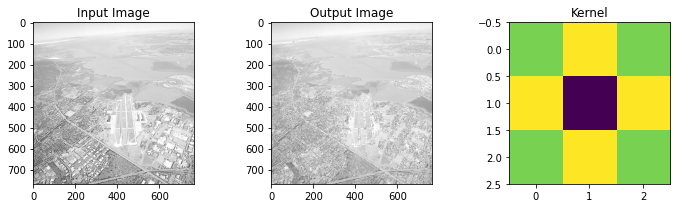

In [20]:
def apply_filter(img, kernel):
    img = cv2.filter2D(img, -1, kernel)
    return img
    
image = cv2.imread('image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
masks = {'l1':[[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], 'l2':[[1,1,1],[1,-8,1],[1,1,1]], 'l3':[[0,-1,0],[-1,4,-1],[0,-1,0]], 'l4':[[0,1,0],[1,-4,1],[0,1,0]]}


for i in range(1,5):
    kernel = np.array(masks[f'l{i}'])
    output = apply_filter(image, kernel)
    # plot the images
    cv2.imwrite(f'output{i}.jpg', output+image)
    fig, axs = plt.subplots(1, 3, figsize=(10, 3))
    axs[0].imshow(image, cmap='gray')
    axs[0].set_title('Input Image')
    axs[1].imshow(image+output, cmap='gray')
    axs[1].set_title('Output Image')
    axs[2].imshow(kernel)
    axs[2].set_title('Kernel')
    plt.tight_layout()
    plt.show()


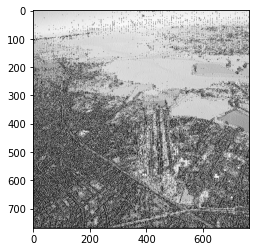

In [27]:
def applymask(img, mask):
    n = len(img)
    m = len(mask)
    nxn = np.zeros((n,n))
    for i in range(n-m+1):
        for j in range(n-m+1):
            nxn[i][j] = sum(sum(img[i:i+m,j:j+m]*mask ))+img[i][j]
    return nxn



def apply_laplacian_mask(image, kernel):
    # Create an output array of the same shape as the input image
    output = np.zeros_like(image)

    # Apply the Laplacian mask to the image
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            # Calculate the sum of the pixel intensities using the 3x3 kernel
            laplacian = np.sum(np.dot(image[i-1:i+2, j-1:j+2] ,  kernel))
            
            # If the calculated value is negative, set it to zero
            laplacian = max(0, min(255, laplacian+ image[i, j]))
            
            # Store the result in the output array
            output[i, j] = laplacian 

    return output



timg = np.array([[1,2,3],[4,5,6],[7,8,9]])
mask = np.array([[1,1,1],[1,1,1],[1,1,1]])

plt.imshow(apply_laplacian_mask(image, masks['l1']), cmap='gray')